In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
# read train data
df = pd.read_csv("train.csv")
df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

In [3]:
# get test data
test_data = pd.read_csv("test.csv")
concat_data = pd.read_csv("solution.csv")

In [4]:
test_df = pd.merge(test_data, concat_data, on='id')
test_df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   65.330  ...            0            0        NaN        NaN        NaN   
1  515.568  ...            0            0        NaN        NaN        NaN   
2  434.884  ...            0            0        NaN        NaN        NaN   
3  171.390  ...            0            0        NaN        NaN        NaN   
4  406.289  ...            0            0        NaN        NaN        NaN   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1692        0.00        0.00        0.00                  0  
1  2533        0.00        0.00        0.00                  0  
2   277      525.61      758.41      241.84                  1  
3  1244        0.00        0.00        0.00                  0  
4   462        0.00        0.00        0.00                  0  

[5 rows x 172 columns]

# data cleaning in train dataset

In [5]:
# fill all nan with 0
df = df.fillna(0)
df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        0.0        0.0        0.0   
1  122.787  ...            0            0        0.0        1.0        0.0   
2  103.176  ...            0            0        0.0        0.0        0.0   
3  205.260  ...            0            0        0.0        0.0        0.0   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

In [6]:
#remove date columns
df = df.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'], axis=1)
df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
0   0        109             0.0             0.0             0.0   31.277   
1   1        109             0.0             0.0             0.0    0.000   
2   2        109             0.0             0.0             0.0   60.806   
3   3        109             0.0             0.0             0.0  156.362   
4   4        109             0.0             0.0             0.0  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  ...  sachet_3g_7  sachet_3g_8  \
0   87.009    7.527        48.58       124.38  ...            0            0   
1  122.787   42.953         0.00         0.00  ...            0            0   
2  103.176    0.000         0.53        15.93  ...            0            0   
3  205.260  111.095         7.26        16.01  ...            0            0   
4  128.191  101.565        21.28         4.83  ...            1            0   

   fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0        0.0        0.0        0.0  1958         0.0         0.0         0.0   
1        0.0        1.0        0.0   710         0.0         0.0         0.0   
2        0.0        0.0        0.0   882         0.0         0.0         0.0   
3        0.0        0.0        0.0   982         0.0         0.0         0.0   
4        1.0        1.0        1.0   647         0.0         0.0         0.0   

   churn_probability  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 163 columns]

In [7]:
#removed these columns because they have a singular value or doesnt contribute to the model
df = df.drop(['id','circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1)

In [8]:
X = df.copy()
y = df.pop('churn_probability')
df.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   31.277   87.009    7.527        48.58       124.38         1.29   
1    0.000  122.787   42.953         0.00         0.00         0.00   
2   60.806  103.176    0.000         0.53        15.93         0.00   
3  156.362  205.260  111.095         7.26        16.01         0.00   
4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  sachet_3g_6  \
0         32.24         96.68          2.33           0.00  ...            0   
1          0.00         25.99         30.89           0.00  ...            0   
2         53.99         82.05          0.00           0.00  ...            0   
3         68.76         78.48         50.23           0.00  ...            0   
4         56.99         38.11          9.63          53.64  ...            0   

   sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  \
0            0            0        0.0        0.0        0.0  1958   
1            0            0        0.0        1.0        0.0   710   
2            0            0        0.0        0.0        0.0   882   
3            0            0        0.0        0.0        0.0   982   
4            1            0        1.0        1.0        1.0   647   

   aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0         0.0         0.0         0.0  
1         0.0         0.0         0.0  
2         0.0         0.0         0.0  
3         0.0         0.0         0.0  
4         0.0         0.0         0.0  

[5 rows x 151 columns]

# data cleaning in test data

In [9]:
# fill all nan with 0
test_df = test_df.fillna(0)

In [10]:
#remove date columns
test_df = test_df.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'], axis=1)

In [11]:
#removed these columns because they have a singular value or doesnt contribute to the model
test_df = test_df.drop(['id','circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1)

In [12]:
y_test = test_df.pop('churn_probability')
X_test = test_df.copy()

# standard scaler

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(X)

# PCA

In [14]:
pca = PCA()
pca.fit(x)

PCA()

In [15]:
#pca.components_

In [16]:
#pca.explained_variance_ratio_

<BarContainer object of 152 artists>

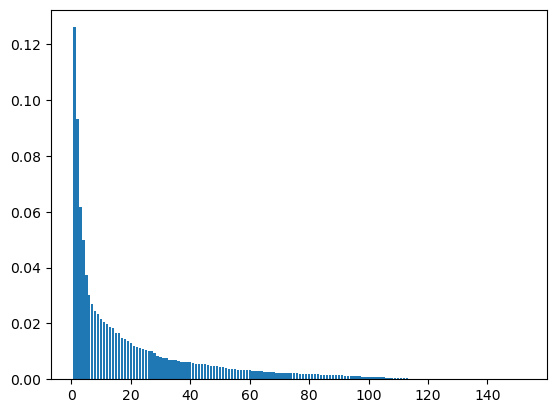

In [17]:
import matplotlib.pyplot as plt
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [18]:
#var_cumu = np.cumsum(pca.explained_variance_ratio_)
#plt.plot(range(1,len(var_cumu)+1), var_cumu)

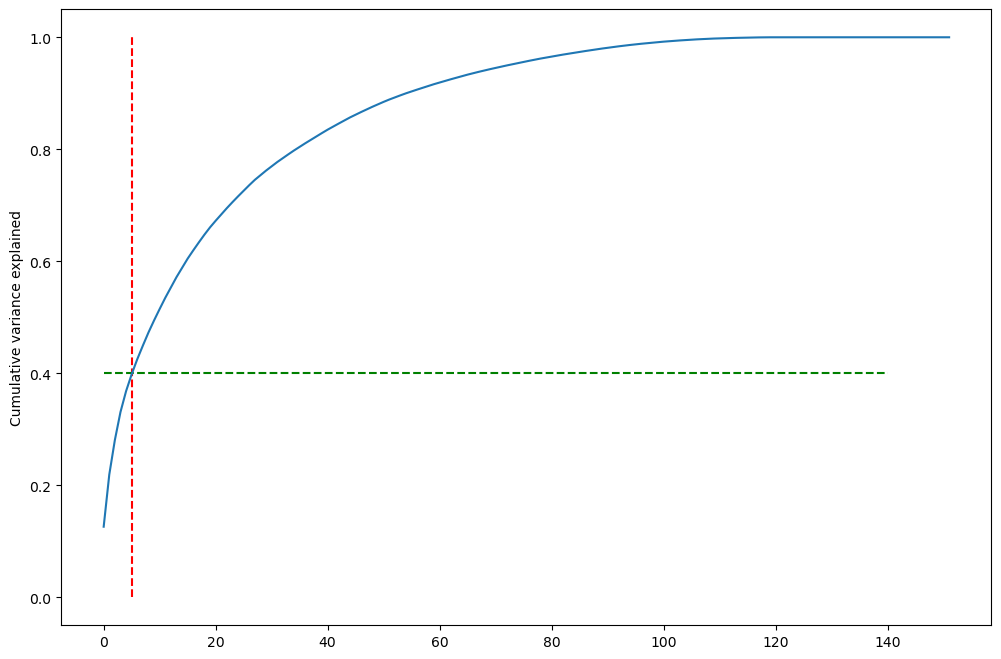

In [19]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=5, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.4, xmax=140, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [20]:
#54 component explained 90% of the cumulative variance
#34 component explained 80% of the cumulative variance
#15 component explained 60% of the cumulative variance
#9 component explained 50% of the cumulative variance
#5 component explained 40% of the cumulative variance

In [21]:
chosen_pca = PCA(n_components = 5)
new_data = chosen_pca.fit_transform(x)

In [22]:
new_df = pd.DataFrame(new_data)
new_df.head()

0         1         2         3         4
0 -3.705899 -0.984635 -0.502035  0.975358  0.135192
1 -2.085431 -2.739486 -0.743675  0.773175 -0.056846
2 -3.630838 -1.135696  0.007195  0.859586  0.030751
3 -2.896580 -0.674037  0.121012  0.944851 -0.352357
4  1.089369 -5.664479 -3.022254 -8.906950 -0.818874

# Log Reg

In [23]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
model_log_reg = log_reg.fit(x,y)
# Predict
y_pred = model_log_reg.predict(x)
# accuracy
accuracy_score(y_test, y_pred[:30000])

0.8150666666666667

# Log Reg on PCA

In [24]:
log_reg_PCA = LogisticRegression()
model_log_reg_PCA = log_reg_PCA.fit(new_df,y)
# Predict
y_pred_PCA = model_log_reg_PCA.predict(new_df)
# accuracy
accuracy_score(y_test, y_pred_PCA[:30000])

0.898

In [25]:
# 0.8221666666666667 on 34 components
# 0.8557666666666667 on 15 components
# 0.8972333333333333 on 9 components
# 0.898 on 5 components

# decision tree

In [26]:
dt = DecisionTreeClassifier()
dt.fit(x, y)

DecisionTreeClassifier()

In [27]:
dt_y_pred = dt.predict(X)
accuracy_score(y_test, dt_y_pred[:30000])

C:\Users\fidel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.8980333333333334

In [28]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

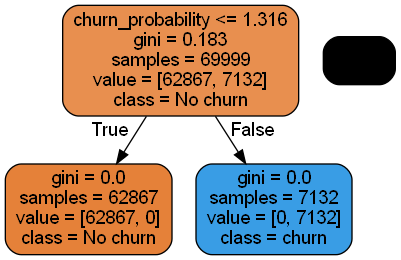

In [29]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No churn', "churn"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

# decision tree on pca

In [30]:
dt_pca = DecisionTreeClassifier()
dt_pca.fit(new_df, y)

DecisionTreeClassifier()

In [31]:
dt_pca_y_pred = dt_pca.predict(new_df)
accuracy_score(y_test, dt_pca_y_pred[:30000])

0.8150666666666667

# random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x, y)

RandomForestClassifier()

In [33]:
rf.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1232308207)

In [34]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [35]:
sample_tree = rf.estimators_[4]

In [36]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.612364 to fit



In [37]:
rf_y_pred = rf.predict(x)
accuracy_score(y_test, rf_y_pred[:30000])

0.8150666666666667

# random forest on PCA

In [38]:
rf_pca = RandomForestClassifier()
rf_pca.fit(new_df, y)

RandomForestClassifier()

In [39]:
rf_pca_y_pred = rf_pca.predict(new_df)
accuracy_score(y_test, rf_pca_y_pred[:30000])

0.8152333333333334